In [3]:
from astropy.wcs import WCS
import astropy
from astropy.io import fits
from astropy.coordinates import Angle
from astropy.utils.data import get_pkg_data_filename
# from regions import CirclePixelRegion, PixCoord
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.nddata import Cutout2D
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator

import warnings
warnings.filterwarnings("ignore")

#%% load function
def load(filename):
    #file = get_pkg_data_filename(filename)
    hdu = fits.open(filename)[0]

    data = hdu.data
    wcs = WCS(hdu.header)
    
    return(data, wcs, hdu)


def find_center_and_scale(hdr):
    obsra, obsdec = hdr["OBSRA"], hdr["OBSDEC"]
    scale_ra, scale_dec = hdr["CDELT1"], hdr["CDELT2"] # deg/pixel
    # center_pixel_ra, center_pixel_dec = hdr["CRPIX1"], hdr["CRPIX2"]
    npxl_ra, npxl_dec = hdr["NAXIS1"], hdr["NAXIS2"]     
    return obsra, obsdec, scale_ra, scale_dec, npxl_ra, npxl_dec  # in deg

#%% cut function
def cut(data, wcs, hdu,center,box):
    size = u.Quantity(box, u.pix)
    cutout = Cutout2D(data,position=center,size=size,wcs=wcs)
    hdu.header.update(cutout.wcs.to_header())
    hdu.data = cutout.data

    wcs_cut = WCS(hdu.header)
    
    return(hdu.data,wcs_cut,hdu)


def cut2(data, wcs, hdu,center,box):
    size = u.Quantity(box, u.deg)
    cutout = Cutout2D(data,position=center,size=size,wcs=wcs)
    hdu.header.update(cutout.wcs.to_header())
    hdu.data = cutout.data

    wcs_cut = WCS(hdu.header)
    
    return(hdu.data,wcs_cut,hdu)

    
#%% find beam function
def find_beam(hdr):
    major = hdr["BMAJ"] # in degree
    minor = hdr["BMIN"]
    pa = hdr["BPA"] # position angle    
    return (major, minor, pa)



In [23]:
file1 = '19035-Kband-Barray-full.fits' # K band
RoseroK_data , RoseroK_wcs2 , RoseroK_hdu1 = load(file1)
centerK_deg = SkyCoord(286.5067083333333,6.776722222222222, frame='fk5', unit='deg')
centerK_pix = RoseroK_wcs.world_to_pixel(centerK_deg)
# print(centerK_pix)
RoseroK_data , RoseroK_wcs , RoseroK_hdu = cut(RoseroK_data , RoseroK_wcs , 
                                               RoseroK_hdu, center=(1048,1224),box=(130,130))


In [26]:
RoseroK_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 286.5045833321  6.776388888507  
CRPIX : -1748.0  -2276.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -1.388888888889e-05  1.388888888889e-05  
NAXIS : 130  130

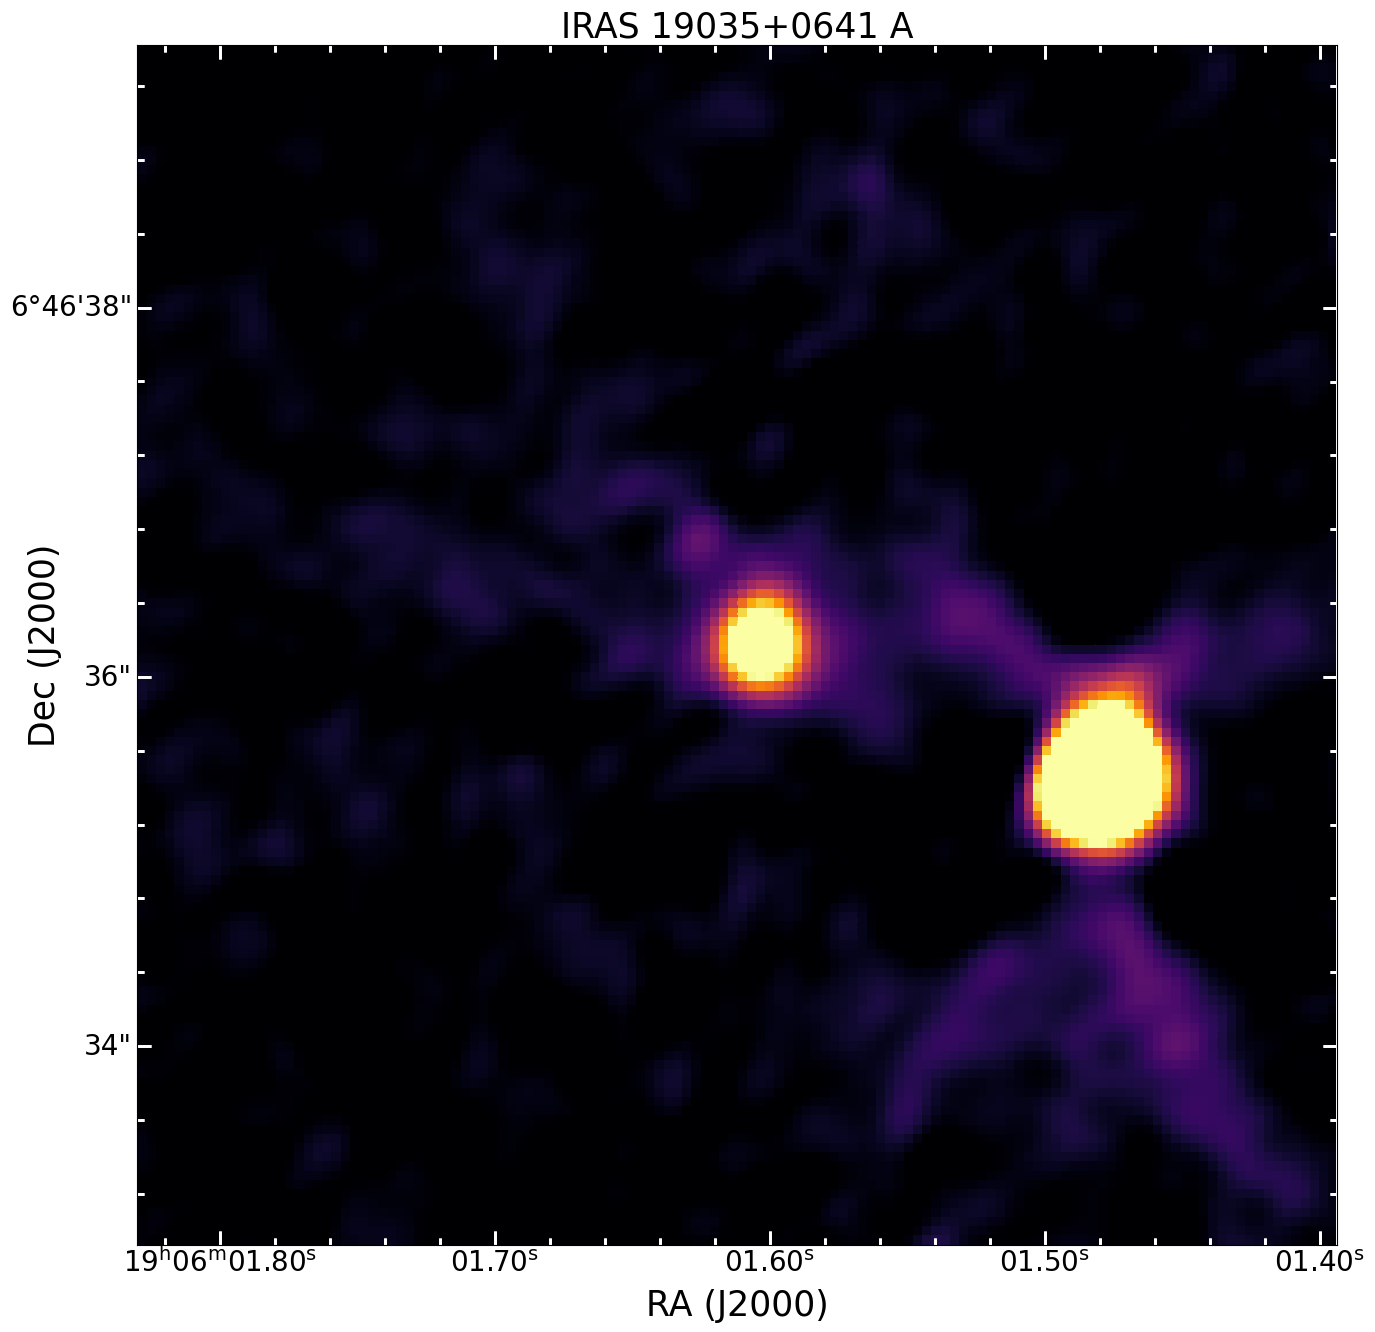

In [10]:

## plot
fig = plt.figure(figsize=(15,15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=RoseroK_wcs)
    
    
    # -- axis label and ticks
ra = ax.coords[0]
dec = ax.coords[1]
ra.set_axislabel("RA (J2000)", minpad=0.8, fontsize=25)
dec.set_axislabel("Dec (J2000)", minpad=-1.0, fontsize=25)
ra.set_major_formatter('hh:mm:ss.ss')
ax.set_title('IRAS 19035+0641 A',fontsize=25)

    
ra.display_minor_ticks(True)
dec.display_minor_ticks(True)    
ax.tick_params(which='both',direction='in',color='white',length=10,width=2,
                   labelsize=20)
ax.tick_params(which='minor', length=5)

    # -- color plot
im=ax.imshow(RoseroK_data, vmin=-1e-9, vmax=0.00023, origin='lower', 
               cmap='inferno', transform=ax.get_transform(RoseroK_wcs))
    